In [1]:
import numpy as np
from Neural_Network import NN
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt(open('Corners.txt',"rt"),delimiter=" ")
np.random.shuffle(data)

In [3]:
train=NN()

In [4]:
X=data[:,:2]
Y=data[:,-1:]
X=train.normalize(X)

In [5]:
#dividing into training data and test data in the ratio 2:1
test_len=X.shape[0]//2
X_test=X[:test_len,:]
X_train=X[test_len:,:]

Y_test=Y[:test_len]
Y_train=Y[test_len:]

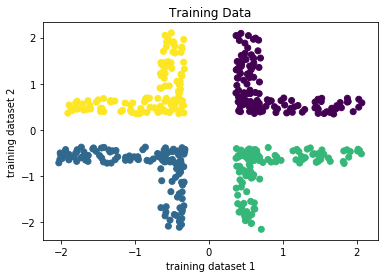

In [6]:
# VISUALIZATION of training data
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.flatten())
plt.xlabel("training dataset 1")
plt.ylabel("training dataset 2")
plt.title("Training Data")
plt.show()

In [7]:
L=4
c=np.unique(Y).shape[0]
sol = np.array((2,25,25,c))       # size of each layer can be customized by the user

train.fitt(X_train,Y_train,sol,L)
Y_pred = train.pred(X_test)

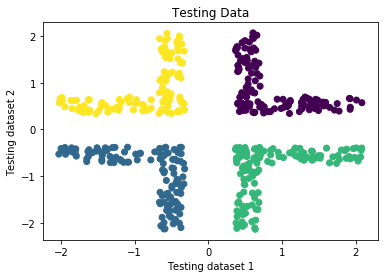

In [8]:
# VISUALIZATION of predicted data
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred)
plt.xlabel("Testing dataset 1")
plt.ylabel("Testing dataset 2")
plt.title("Testing Data")
plt.show()

In [9]:
Acc = train.accuracy(Y_test,Y_pred)
print("Accuracy of my model: ",Acc," %")

Accuracy of my model:  100.0  %


In [10]:
#calculating accuracy of sklearn model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',batch_size=25,hidden_layer_sizes=(128))
clf.fit(X_train, np.hstack(Y_train))
y_pred=clf.predict(X_test)
A=(y_pred==Y_test.flatten())
acc=np.mean(A)*100
print("accuracy of sklearn=",acc,"%")

accuracy of sklearn= 100.0 %
